In [1]:
# !pip install virtualenv---best to install on the command c
#!virtualenv myenv
#!source myenv/bin/activate
#!pip install pandas_datareader

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web

In [3]:
start = '2001-01-01'
end = '2023-01-31'


TAB1 = web.DataReader('DEXUSEU', 'fred', start, end)
TAB1.head()



,DEXUSEU
DATE,
2001-01-01,NaN
2001-01-02,0.9465
2001-01-03,0.9473
2001-01-04,0.9448
2001-01-05,0.9535


In [4]:
TAB1.interpolate()

,DEXUSEU
DATE,
2001-01-01,NaN
2001-01-02,0.9465
2001-01-03,0.9473
2001-01-04,0.9448
2001-01-05,0.9535
...,...
2023-01-23,1.0865
2023-01-24,1.0873
2023-01-25,1.0901


In [5]:
date1 = TAB1.index
EURUS = TAB1.iloc[:,0]

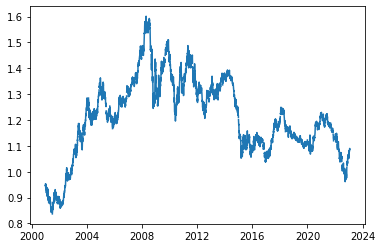

In [6]:
import matplotlib.pyplot as plt

plt.plot(date1, EURUS)

In [7]:
date2 = date1[1:]
EURUSdiff = np.diff(np.log(EURUS))

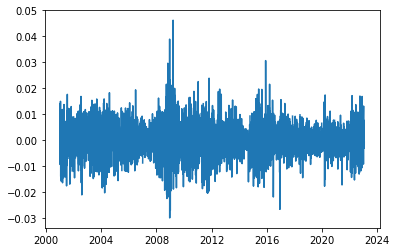

In [8]:
plt.plot(date2, EURUSdiff)

A $\underline{kernel}$  is a $\underline{non-negative}$  real-valued integrable weighting function K for a random variable u.

For most applications, it is desirable to define the function to satisfy two additional requirements, namely, 

$\int_{-inf}^{inf}K(u)du = 1$

K(-u) = K(u), $\forall{u}$

The two most commonly kernel functions for a random variable u are the Gaussian and the Epinechnikov kernels:

$k_g(u)$ = $\frac{1}{\sqrt{2 \pi}} \exp^{-.5u^2}$

$k_e(u)$ = $\frac{3}{4}u^2$, $\forall{u},\ |{u}|\leq 1$

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,
          0.,   2.,   1.,   3.,   0.,   2.,   1.,   3.,   3.,   2.,   5.,
          2.,   1.,   6.,   6.,   5.,   7.,   6.,  11.,   7.,   8.,  10.,
         11.,   8.,  18.,  18.,  21.,  24.,  19.,  19.,  18.,  21.,  26.,
         27.,  30.,  42.,  35.,  42.,  43.,  53.,  80.,  65.,  69.,  63.,
        110.,  96.,  86.,  93., 109., 130., 153., 153., 153., 159., 181.,
        209., 196., 184., 172., 183., 154., 161., 125., 150., 143., 117.,
        108., 108.,  86.,  84.,  77.,  74.,  62.,  56.,  69.,  53.,  42.,
         45.,  37.,  36.,  32.,  30.,  21.,  22.,  29.,  28.,  16.,  12.,
         12.,  12.,   7.,   9.,   9.,  12.,   3.,   6.,   3.,   4.,   4.,
          4.,   3.,   2.,   4.,   2.,   1.,   1.,   1.,   1.,   3.,   2.,
          1.,   0.,   1.,   2.,   0.,   2.,   0.,   1.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0., 

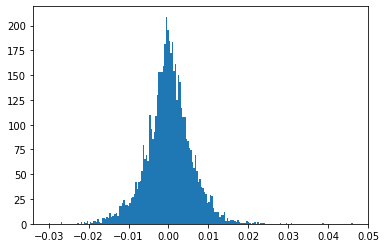

In [9]:
plt.hist(EURUSdiff, 200)


In [10]:
import pandas as pd
EURUSdiff = pd.DataFrame(EURUSdiff)


EURUSdiff.replace([np.inf, -np.inf], np.nan)
# Drop rows with NaN
EURUSdiff.dropna

EURUSdiff.dropna()


,0
1,0.000845
2,-0.002643
3,0.009166
4,-0.005152
5,-0.009427
...,...
5754,0.003134
5755,0.000736
5756,0.002572
5757,-0.003216


In [11]:
print(np.isnan(EURUSdiff).any())
print(np.isinf(EURUSdiff).any())
EURUSdiff = EURUSdiff[~np.isnan(EURUSdiff)]
EURUSdiff = EURUSdiff[~np.isinf(EURUSdiff)]

0    True
dtype: bool
0    False
dtype: bool


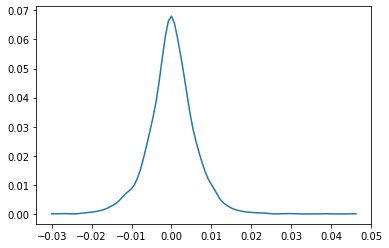

In [12]:
from scipy import stats
EURUSdiff = np.array(EURUSdiff)
EURUSdiff = EURUSdiff[~np.isnan(EURUSdiff)]
EURUSdiff = EURUSdiff[~np.isinf(EURUSdiff)]

kde = stats.gaussian_kde(EURUSdiff)
Xe = np.linspace(np.min(EURUSdiff), np.max(EURUSdiff), 100)
Fe = kde(Xe)
Fe = Fe/np.sum(Fe)

plt.plot(Xe, Fe)


Let's see how well an SVJD (Stochastic Volatility Jump Diffusion) Process can fit this kernel:

$\textbf{Stochastic Volatility Jump Diffusion Model}$
This model has the following continuous time representation:

$((dS)/S) = (\mu-\lambda k)⋅dt+√V⋅dZ+k⋅dq $

$ dV  = (\alpha-\beta V)⋅dt+\sigma_{v}√V⋅dZ_{v}$ 

$ Corr(dZ,dZ_{v})  = \rho $

$ prob(dq  = 1)=\lambda dt $

$ ln(1+\bar{k}) \sim \phi(ln[1+\bar{k}]-.5 \delta, \delta^{2}) $

where dS/S is the rate of return on an asset, $\mu$ is the expected rate of appreciation, $\lambda$ the annual frequency of jumps, k the random percentage jump conditional on the jump occurring.  
The variable ln(1+k) is distributed normally with mean ln[1+k]-.5 $\kappa$  and variance $\kappa^{2}$.  The symbol $\phi$  represents the normal distribution. The advantage of the continuous-time representation is that the time interval can become arbitrarily smaller, and approximate "real time" changes.  

The instantaneous conditional variance V follows a mean-reverting square root process.  The parameter $\alpha$  is the mean of the conditional variance, while $\beta$ is the mean-reversion coefficient.  The coefficient $\sigma_{v}$ is the variance of the volatility process, while the noise terms dZ and $dZ_{v}$ are the standard continuous-time "white noise" Weiner processes, with correlation coefficient $\rho$.

This process has two major advantages.  First, it allows systematic volatility risk, and secondly, it generates an "analytically tractable method" for pricing options without sacrificing accuracy or unnecessary restrictions.

Previously we specified the following set of parameters to simulate an SVJD process:


𝑃𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠 𝑓𝑜𝑟 𝑆𝑉𝐽𝐷 𝑃𝑟𝑜𝑐𝑒𝑠𝑠⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯ 

Mean Return  𝜇  .21

Mean volatility  𝛼  .0003

Mean reversion of volatility  𝛽  .7024

Time interval (daily) dt 1/250

Expected jump k .3

Standard deviation of percentage jump  $\delta$  .0281

Annual frequency of jumps  𝜆  2

Correlation of Weiner processes  𝜌  .6

Now let's try to estimate them, by simulation, to generate a Kernel desnity which comes close to matching the actual Epinichikov kernel.

In this model, $S_{t+1}$ is equal to $S_{t}+[S_{t}⋅(\mu-\lambda k)] ⋅dt$, and for a small value of dt,  it will be unit-root nonstationary.  

After first-differencing, the model will be driven by the components of dV and k⋅dq, which are random terms. 

Spedifically we want to feed into an SVJD model the following parameters:

$\Omega = [ \lambda \ \bar{k} \  \delta \  \alpha \ \beta  \ \sigma_v \  \rho \  \mu]$

For daily data, we set the time change at 1/250.  We will simulate the model for lenght 10000 to see if it can match the empirical kernel

So we are going to estimate a model for eight parameters, to minimize the distance between the two kernel desnities, one for the actual data and one for the simulated data.  This is called ${estimation \ by \ simulation}$  We are looking for the parameter vector $\hat{\Omega}$

In [13]:
hh = 250;
h = 1/hh;
rr = 1000;
data = Xe.T
data1 = Fe.T
seed = 0
np.random.seed(seed)

y = EURUSdiff
z = np.random.normal(size=(rr, 1))
zk = np.random.normal(size=(rr, 1))
junkz = z
junkzk = zk
betab =[.003, .7024, .0281, .3, 2, .21, .01, .6]



In [14]:
import math

import numpy as np
import pandas as pd
import scipy
from scipy import stats
def autocorr(x):
    x = np.array(x)
    x = x.reshape((-1,))
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]


def svjdproc1(betab, fixed_arg1 = "hh", fixed_arg2 = "rr", fixed_arg3 = "data", fixed_arg4 = "data1", 
              fixed_arg5 = "y", fixed_arg6 = junkz, fixedarg7=junkzk):
   # global fixed_params1, fixed_params2, fixed_params3, fixed_params4, fixed_params5
   
    h = 1 / hh
    z = junkz
    zk = junkzk
    v = np.zeros((rr, 1))
    kx = np.zeros((rr, 1))
    v[0, 0] = .0001
    kx[0, 0] = 0
    alpha = np.abs(betab[0])
    beta = min(.95, abs(betab[1]))
    yhat = np.zeros((rr, 1))

    delta = abs(betab[2])
    kbar = abs(betab[3])
    _lambda = math.ceil(np.abs(betab[4]))
    if _lambda > 4:
        _lambda = 4
    else:
        _lambda = _lambda
    poiss = np.random.poisson(_lambda * h, size=(rr, 1));
    mu = np.abs(betab[5])
    sigmav = np.abs(betab[6])
    rho = betab[7]

    for i in range(1, rr):
        kx[i, 0] = zk[i, 0] * delta + np.log(1 + kbar) - .5 * delta ** 2
        yhat[i, 0] = (mu - _lambda * kbar) * h + np.sqrt(v[i - 1, :]) * z[i, 0] + kx[i, 0] * poiss[i, 0]
        if np.isnan(yhat[i, 0]) or np.isinf(yhat[i, 0]):
            yhat[i, 0] = 1000
        else:
            yhat[i, 0] = yhat[i, 0]
        v[i, 0] = max(.0001, v[i - 1, 0]
                      + (alpha - beta * v[i - 1, 0]) * h
                      + sigmav * np.sqrt(v[i - 1, 0]) * rho * z[i, 0])
    kde = stats.gaussian_kde(yhat.T)
    yhats = np.linspace(np.min(yhat), np.max(yhat), 100)
    f1hat = kde(yhats)
    f1hat = f1hat / np.sum(f1hat)
    jump = kx * poiss
    junk1 = 1 + np.mean(jump)
    junk2 = np.cov(kx.T, jump.T)
    junk3 = junk2[0, 1]
    lambdastar = _lambda * junk1
    kbarstar = kbar + junk3 / junk1
    theta = [lambdastar, kbarstar, delta, alpha, beta, sigmav, rho, mu]
    ys = data
    f1 = data1
    error0 = np.mean(ys) - np.mean(yhats);
    error1 = ys - yhats
    error2 = f1 - f1hat
    error3 = np.var(ys) - np.var(yhats)
    error4 = scipy.stats.skew(ys) - scipy.stats.skew(yhats);
    error5 = scipy.stats.kurtosis(ys) - scipy.stats.kurtosis(yhats);
    junk1 = autocorr(y)
    rho1_y = junk1
    junk2 = autocorr(y ** 2);
    rho2_y = junk2
    junk3 = autocorr(yhat[:])
    rho1_yhat = junk3[1]
    junk4 = autocorr(yhat[:] ** 2)
    rho2_yhat = junk4[1]
    error6 = rho1_y - rho1_yhat
    error7 = rho2_y - rho2_yhat

    ERROR = error0 ** 2 + np.sum(error1 * error1) + np.sum(error2 * error2) + error3 ** 2 + error4 ** 2 + error5 ** 2
    + error6 ** 2 + error7 ** 2

    return ERROR

In [15]:
  
    
def svjdproc2(betab, fixed_arg1 = "hh", fixed_arg2 = "rr", fixed_arg3 = "data", fixed_arg4 = "data1", fixed_arg5 = "y", fixed_arg6 = junkz, fixedarg7=junkzk):
    # global fixed_params1, fixed_params2, fixed_params3, fixed_params4, fixed_params5
   
    h = 1 / hh
    seed = 0
    np.random.seed(seed)
    z = junkz
    zk = junkzk
    v = np.zeros((rr, 1))
    kx = np.zeros((rr, 1))
    v[0, 0] = .0001
    kx[0, 0] = 0
    alpha = np.abs(betab[0])
    beta = min(.95, abs(betab[1]))
    yhat = np.zeros((rr, 1))

    delta = abs(betab[2])
    kbar = abs(betab[3])
    _lambda = math.ceil(np.abs(betab[4]))
    if _lambda > 4:
        _lambda = 4
    else:
        _lambda = _lambda
    poiss = np.random.poisson(_lambda * h, size=(rr, 1));
    mu = np.abs(betab[5])
    sigmav = np.abs(betab[6])
    rho = betab[7]

    for i in range(1, rr):
        kx[i, 0] = zk[i, 0] * delta + np.log(1 + kbar) - .5 * delta ** 2
        yhat[i, 0] = (mu - _lambda * kbar) * h + np.sqrt(v[i - 1, :]) * z[i, 0] + kx[i, 0] * poiss[i, 0]
        if np.isnan(yhat[i, 0]) or np.isinf(yhat[i, 0]):
            yhat[i, 0] = 1000
        else:
            yhat[i, 0] = yhat[i, 0]
        v[i, 0] = max(.0001, v[i - 1, 0]
                      + (alpha - beta * v[i - 1, 0]) * h
                      + sigmav * np.sqrt(v[i - 1, 0]) * rho * z[i, 0])
    kde = stats.gaussian_kde(yhat.T)
    yhats = np.linspace(np.min(yhat), np.max(yhat), 100)
    f1hat = kde(yhats)
    f1hat = f1hat / np.sum(f1hat)
    jump = kx * poiss
    junk1 = 1 + np.mean(jump)
    junk2 = np.cov(kx.T, jump.T)
    junk3 = junk2[0, 1]
    lambdastar = _lambda * junk1
    kbarstar = kbar + junk3 / junk1
    theta = [lambdastar, kbarstar, delta, alpha, beta, sigmav, rho, mu]
    ys = data
    f1 = data1
    error0 = np.mean(ys) - np.mean(yhats);
    error1 = ys - yhats
    error2 = f1 - f1hat
    error3 = np.var(ys) - np.var(yhats)
    error4 = scipy.stats.skew(ys) - scipy.stats.skew(yhats);
    error5 = scipy.stats.kurtosis(ys) - scipy.stats.kurtosis(yhats);
    junk = autocorr(y)
    rho1_y = junk
    junk2 = autocorr(y ** 2);
    rho2_y = junk2
    junk3 = autocorr(yhat[:])
    rho1_yhat = junk3[1]
    junk4 = autocorr(yhat[:] ** 2)
    rho2_yhat = junk4[1]
    error6 = rho1_y - rho1_yhat
    error7 = rho2_y - rho2_yhat

    ERROR = error0 ** 2 + np.sum(error1 * error1) + np.sum(error2 * error2) + error3 ** 2 + error4 ** 2 + error5 ** 2
    + error6 ** 2 + error7 ** 2

    return ERROR, theta, ys, f1, yhats, f1hat 
    

In [16]:
ERROR = svjdproc1(betab)
ERROR


2.143374832145507

$\textbf{Local Gradient-Based Search:  The Quasi-Newton Method and Backpropagation}$

To minimize any non-linear function, we usually begin by ”initializing”  the parameter vector $\Omega$ at any initial value, $\Omega_{0}$,perhaps at randomly chosen values. We then ”iterate” on the coefficient set $\Omega$ until an error metric $ \Psi$ is minimized, by making use of first and second-order derivatives of the ”error metric” $\Psi$  with respect to the parameters.  This type of search, called a ”gradient-based search”, is for the optimum ”in the neighborhood” of the initial parameter vector, $\Omega_{0}$  For this reason, this type of search is a ”local” search.

The usual way in which one goes about doing this iteration is through the quasi-Newton algorithm. Starting with the initial set of sum of squared errors, $\Psi(\Omega_{0})$, based on the initial coefficient vector $\Omega_{0}$, a second-order Taylor expansion is used to find $\Psi(\Omega_{1}):\Psi(\Omega_{1})=\Psi(\Omega_{0})+\nabla_{0}(\Omega_{1}-\Omega_{0})+.5(\Omega_{1}-\Omega_{0})^{\prime}H_{0}(\Omega_{1}-\Omega_{0})$

where $\nabla_{0}$ is the gradient of the error function with respect to the parameter set $\Omega_{0}$ and $H_{0\text{ }}$ is the Hessian of the error function.

Letting $\Omega_{0}=[\Omega_{0,1},...\Omega_{0,k}]$, be the initial set of k parameters used in the network, the gradient vector $\nabla_{0}$ is defined as follows:

$\nabla_{0}=\left(\begin{array}{c}
\frac{\Psi(\Omega_{0,1}+h_{1},...\Omega_{0,k})-\Psi(\Omega_{0,1},...\Omega_{0,k})}{h_{1}}\\
\frac{\Psi(\Omega_{0,1}...\Omega_{0,i}+h_{i}...,\Omega_{0,k})-\Psi(\Omega_{0,1},...\Omega_{0,k})}{h_{i}}\\
.\\
.\\
\frac{\Psi(\Omega_{0,1},...\Omega_{0,i}..\Omega_{0,k}+h_{k})-\Psi(\Omega_{0,1},...\Omega_{0,k})}{h_{k}}
\end{array}\right)$

The denominator $h_{i}$  is usually set at max($\epsilon$,$\epsilon$$\Omega_{0,i})$,with $\epsilon=10^{-6}$.

The Hessian $H_{0}$ is the matrix of second-order partial derivatives of $\Psi$ with respect to the elements of $\Omega_{0}$, and are computed in a similar matter as the Jacobian or gradient vector.  The cross-partials or off-diagonal elements of the matrix $H_{0\text{ }}$ are given by the formula:

$\frac{\partial^{2}\Psi}{\partial\Omega_{0,i}\partial\Omega_{0,j}}=\frac{1}{h_{j}h_{i}}\left[\begin{array}{c}
\{\Psi(\Omega_{0,1},...,\Omega_{0,i}+h_{i},\Omega_{0,j}+h_{j},...\Omega_{0,k})-\Psi(\Omega_{0,1}...\Omega_{0,i,...}\Omega_{0,_{j}}+h_{j}...\Omega_{0,k})\}\\
-\{\Psi(\Omega_{0,1},...,\Omega_{0,i}+h_{i},\Omega_{0,j},...\Omega_{0,k})-\Psi(\Omega_{0,1},...\Omega_{0,k})\}
\end{array}\right]$

The direct second-order partials or diagonal elements are given by:

$\frac{\partial^{2}\Psi}{\partial\Omega_{0,i}^{2}}=\frac{1}{h_{i}^{2}}\left(\begin{array}{c}
\Psi(\Omega_{0,1},...,\Omega_{0,i}+h_{i},...\Omega_{0,k})-2\Psi(\Omega_{0,1},...\Omega_{0,k})\\
+\Psi(\Omega_{0,1},...,\Omega_{0,i}-h_{i},...\Omega_{0,k})
\end{array}\right)$

In [17]:
from scipy.optimize import minimize 
result = minimize(svjdproc1,betab)

In [18]:
betab = result.x
betab


array([0.00301083, 0.70240573, 0.02810822, 0.30001624, 2.00001221,
       0.21001386, 0.0100081 , 0.6000108 ])

In [19]:
ERROR

2.143374832145507

In [20]:
ERROR, theta, ys, f1, yhats, f1hat =svjdproc2(betab)


$\textbf{Simulated  Annealing}$


1. Specify  Temperature   and  ”Cooling Schedule”  Parameter,   $\bar{T}$ 

1a.Operation:   T(j)= $\frac{\bar{T}}{1+\ln[j]}$

2. Start Random Process at j=0, continue till j=(1,2,...$\bar{T}$)

3. Initialize Solution Vector and Error Metric: 

3a.$\Omega_{0}, \Psi_{0}$


4.  Randomly Perturbate Solution Vector, Obtain Error Metric for each j: 

4a. $\widehat{\Omega}_{j}, \widehat{\Psi}_{j}$

5.  Generate P(j) from Uniform Distribution 

5a  0 $\leq$ P(j) $\leq$ 1

6.    Compute Metropolis Ratio M(j)  

6a    M(j) $=exp{\left[\frac{-\left(\widehat{\Psi}_{j}-\Psi_{j-1}\right)}{T(j)}\right]}$

7.     Accept New Vector $\widehat{\Omega}_{j}$  Unconditionally if

7a.   $\Omega_{j}= \widehat{\Omega}_{j}{\Leftrightarrow}\left(\widehat{\Psi}_{j}-\Psi_{j-1}\right) <0$ 

8.    Accept New Vector $\Omega_{j}=\widehat{\Omega}_{j}$  Conditionally if:

8a    P(j) $\leq$ M(j)

9.    Continue process till j= $\bar{T}$ 

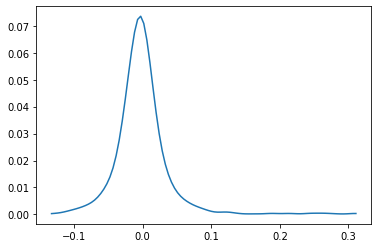

In [21]:
plt.plot(yhats,f1hat)

$\textbf{Evolutionary Stochastic Search: The Genetic Algorithm}$



Both the Newton-based optimization (including backpropagation) and Simulated Annealing (SA) start with one random initialization vector $\Omega_{0}$.  It should be clear that the usefulness of both of these approaches to optimization crucially depend on how ”good” this initial parameter guess really is.  The genetic algorithm or GA helps us come up with a better ”guess” for using either of these search processes.  

The GA reduces the likelihood of landing in a local minimum.  We no longer have to approximate the Hessians. 
The GA proceeds in the following steps.

1. Population creation

This method starts not with one random coefficient vector $\Omega$, but with a population $N^{\ast}$ (an even number) of random vectors.  

Letting p be the size of each column vector, representing the total number of coefficients to be estimated in the neural network, we create a population $N^{\ast}$ of p by 1 random vectors.  

$\left(\begin{array}{c}
\begin{array}{c}
\Omega_{1}\\
\Omega_{2}\\
\Omega_{\substack{3}
}
\end{array}\\
.\\
.\\
\Omega_{p}
\end{array}\right)_{1}\left(\begin{array}{c}
\begin{array}{c}
\Omega_{1}\\
\Omega_{2}\\
\Omega_{\substack{3}
}
\end{array}\\
.\\
.\\
\Omega_{p}
\end{array}\right)_{2}\left(\begin{array}{c}
\begin{array}{c}
\Omega_{1}\\
\Omega_{2}\\
\Omega_{\substack{3}
}
\end{array}\\
.\\
.\\
\Omega_{p}
\end{array}\right)_{i}...\left(\begin{array}{c}
\begin{array}{c}
\Omega_{1}\\
\Omega_{2}\\
\Omega_{\substack{3}
}
\end{array}\\
.\\
.\\
\Omega_{p}
\end{array}\right)_{N\ast}
$

2 Selection

The next step is to select two pairs of coefficients from the population at random, with replacement.  Evaluate the ”fitness” of these four coefficient vectors, in two pair wise combinations, according to the sum of squared error function given above.  Coefficient vectors which come closer to minimizing the sum of squared errors receive ”better” fitness values.

This is a simple fitness ”tournament” between the two pairs of vectors: the winner of each tournament is the vector with the best ”fitness”. These two winning vectors (i,j)are retained for ”breeding” purposes.  While not always used, it has proven to be  extremely useful for speeding up the convergence of the genetic search process.   
$\left(\begin{array}{c}
\begin{array}{c}
\Omega_{1}\\
\Omega_{2}\\
\Omega_{\substack{3}
}
\end{array}\\
.\\
.\\
\Omega_{p}
\end{array}\right)_{i}\left(\begin{array}{c}
\begin{array}{c}
\Omega_{1}\\
\Omega_{2}\\
\Omega_{\substack{3}
}
\end{array}\\
.\\
.\\
\Omega_{p}
\end{array}\right)_{j}
$

3 Crossover

The next step is crossover, in which the two parents ”breed” two children.  The algorithm allows ”crossover” to be performed on each pair of coefficient vectors i and j, with a fixed probability p>0.  If crossover is to be performed, the algorithm uses one of three difference crossover operations, with each method having an equal (1/3) probability of being chosen:

1. Shuffle crossover.  For each pair of vectors, k random draws are made from a binomial distribution. If the $k^{th}$ draw is equal to 1, the coefficients $\Omega_{i,p}$ and $\Omega_{j,p}$ are swapped; otherwise, no change is made.

2. Arithmetic crossover. For each pair of vectors, a random number is chosen, $\omega\in(0,1)$. This number is used to create two new parameter vectors which are linear combinations of the two parent factors, $\omega\Omega_{i,p}+(1-\omega)\Omega_{j,p},(1-\omega\Omega_{i,p}+\omega)\Omega_{j,p}$.

3. Single-point crossover. For each pair of vectors, an integer I is randomly chosen from the set [1,k-1].  The two vectors are then cut at integer I and the coefficients to the right of this cut point, $\Omega_{i,I+1},\Omega_{j,I+1}$ are swapped. 

In binary-encoded genetic algorithms, single-point crossover is the standard method.  There is no consensus in the genetic algorithm literature on which method is best for real-valued encoding.  

Following the operation of the crossover operation, each pair of ”parent” vectors is associated with two ”children” coefficient vectors, which are denoted C1(i) and C2(j).  If crossover has been applied to the pair of parents, the children vectors will generally differ from the parent vectors.

4 Mutation

The fifth step is mutation of the children.  With some small probability $\widetilde{pr}$, which decreases over time, each element or coefficient of the two children's vectors is subjected to a mutation.  The probability of each element is subject to mutation in generation $G=1,2,...G^{\ast}$, given by the probability $\widetilde{pr}=.15+.33/G$.

If mutation is to be performed on a vector element, we use the following non-uniform mutation operation, due to Michalewicz (1996).  

Begin by randomly drawing two real numbers $r_{1}$ and $r_{2}$ from the [0,1] interval and one random number s, from a standard normal distribution.  The mutated coefficient $\widetilde{\Omega} _{i,p}$ is given by the following $formula:\widetilde{\Omega}_{i,p}=\left\{ \begin{array}{c}
\Omega_{i,p}+s[1-r_{2}^{(1-G/G^{\ast})^{b}}]\text{ if }r_{1}>.5\\
\Omega_{i,p}-s[1-r_{2}^{(1-G/G^{\ast})^{b}}]\text{ if }r_{1}\leq.5
\end{array}\right\} $

where G is the generation number, $G^{\ast}$ is the maximum number of generations, and b is a parameter which governs the degree to which the mutation operation is non-uniform.  Usually we set b= 2.  Note that the probability of creating a new coefficient via mutation which is far from the current coefficient value diminishes as $G\rightarrow G^{\ast}$, where $G^{\ast}$ is the number of generations.  Thus, the mutation probability itself "evolves" through time  

The mutation operation is non-uniform since, over time, the algorithm is sampling increasingly more intensively in a neighborhood of the existing coefficient values.  This more localized search allows for some fine tuning of the coefficient vector in the later stages of the search, when the vectors should be approaching close to a global optimum.

5 Election tournament

The last step is the election tournament.  Following the mutation operation, the four members of the ”family” (P1,P2,C1,C2) engage in a fitness tournament.  The children are evaluated by the same fitness criterion used to evaluate the parents.  The two vectors with the best fitness, whether parents or children, survive and pass to the next generation, while the two with the worst fitness value are extinguished.  This election operator is due to Arifovic (1996).  She notes that this election operator "endogenously controls the realized rate of mutation" in the genetic search process [Arifovic (1996): p. 525].

We repeat the above process, with parents i and j returning to the population pool for possible selection again, until the next generation is populated by N* vectors.

6 Elitism

Once the next generation is populated, we can introduce elitism (or not)  Evaluate all the members of the new generation and the past generation according to the fitness criterion.  If the ”best” member of the older generation dominated the best member of the new generation, then this member displaces the worst member of the new generation and is thus eligible for selection in the coming generation.

7 Convergence

One continues this process for $G^{\ast}$ generations.  Unfortunately, the literature gives us little guidance about selecting a value for $G^{\ast}$. Since we evaluate convergence by the fitness value of the best member of each generation, $G^{\ast}$ should be large enough so that we see no changes in the fitness values of the "best" for several generations.  

8  Evolutionary Genetic Algorithms

Just as the genetic algorithm is an "evolutionary search process" for finding the best coefficient set $\Omega$ of p elements, the parameters of the genetic algorithm, such as population size, probability of crossover, initial mutation probability, use of elitism or not, can evolve themselves.  As Fogel and Michalewicz (2002) observe, "let's admit that finding good parameter values for an evolutionary algorithm is a poorly structured, ill-defined, complex problem. But these are the kinds of problems for which evolutionary algorithms are themselves quite adept" [Fogel and Michalewicz (2002): p.281].  They suggest two different ways to do make a genetic algorithm evolutionary.  One, as we suggested with the mutation probability, is to use a feedback rule from the state of the system which modifies a parameter during the search process. Alternatively, we can incorporate the training parameters into the solution by modifying $\Omega$, to include additional elements, such as population size, use of elitism, crossover probability.  These parameters thus become subject to evolutionary search along with the solution set $\Omega$ itself.

$\textbf{The Particle Swarm Algorithm}$

The Particle Swarm algorithm is similar to the GA.  Both start out with a wide set of candidate solutions to the parameter sector.   It is take from the social behavior of animal groups foraging for food, who are able to share information within their group or swarm, which gives them survival knowledge.

Each parameter $\Omega_{i}$is a position vector, or particle, in the swarm and consists of K-elements at iteration t: 

$\Omega_{i}^{t}$ = $[\omega_{i,1}^t, \omega_{i,2}^t ...\omega_{i,k}^t]$, k=1...K,  for i=1.,,,N position vectors

Each position vector tries to optimize a payoff or fitness function $f(\Omega_{i}^t)$

For each position vector, $\Omega_{i}$ there is a Velocity vector $V_{i}^t$.  Each velocity vector is updated at each iteration t, for each of the N position vectors, in the following way:

$V_{i,k}^{t+1} = c_0 V_{i,k}^t + c_1 r_1^t (Pbest_{i,k}-\Omega_{i,k}^t) + c_2 r_2^t(Gbest_{i,k}^t-\Omega_{i,k}^t)$

Given the law of motion of the Velocity of each position vector in the swarm, each position vector updates in the following way:

$\Omega_{i,k}^{t+1}= \Omega_{i,k}^t + V_{i,k}^{t+1}$

The parameter $c_0$ is the inertia coefficient,and is positive, with 0 $\le c_0 \le 1$

The individual cognition term is given by $c_1$.  It is related to the difference between the particle's current position and its best.  The parameter $c_1$ is shocked by a uniform random term, $r_1^t$.  This random terms plays an important role for avoiding premature convergence.

The term $c_2$ is the social learning term.  Because of it all members of the swarm are able to share the information of the best point, given by $Gbest_{i,k}^t$, regardless of which particle found it.  This parameter is also subject to a uniform shock, $r_1^t$.

The parameters for learning are usually set to 2.  The number of particles is usually set between 20 and 40.

Like the GA, it is derivative-free and has fewer "hyper-parameters".


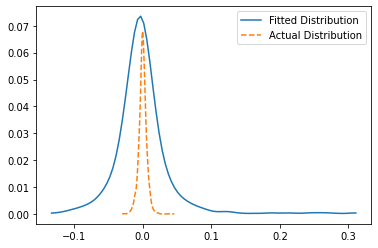

In [22]:
import matplotlib.pyplot as plt



plt.plot(yhats, f1hat, '-', label='Fitted Distribution')
plt.plot(Xe, Fe, '--', label='Actual Distribution')
plt.legend()
plt.show()

In [23]:

from multiprocessing import Process
from scipy.optimize import differential_evolution
import numpy as np
from scipy.optimize import optimize 
bounds = [[.001,betab[0]*2],[.001,betab[1]*2],[.001,betab[2]*2],[.001,betab[3]*2],[.001,betab[4]*2],[.001,betab[5]*2],[.001,betab[6]*2],[.001,betab[7]*2]]

result1 = scipy.optimize.shgo(svjdproc1,bounds)

#result = differential_evolution(svjdproc1, bounds, x0=betab,maxiter=100, popsize=100, tol=.001, workers= 12)
#print("Optimal Solution: ", result.x)
#print("Objective Value: ", result.fun)


#f = svjdproc1(betab1,fixed_param1, fixed_param2, fixed_param3,fixed_param4, fixed_param5)


C:\Users\mcnelis\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [24]:
ERROR1 = result1.fun
ERROR1

0.049199359345761244

In [25]:
betab1 = result1.x

In [26]:
ERROR1a, theta, ys, f1, yhats, f1hat =svjdproc2(betab1)
ERROR1a

0.049190574758212424

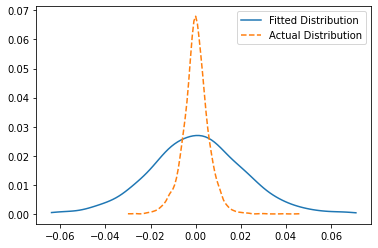

In [27]:
plt.plot(yhats, f1hat, '-', label='Fitted Distribution')
plt.plot(Xe, Fe, '--', label='Actual Distribution')
plt.legend()
plt.show()

In [28]:
bounds = [[.001,betab1[0]*2],[.001,betab1[1]*2],[.001,betab1[2]*2],[.001,betab1[3]*2],[.001,betab1[4]*2],[.001,betab1[5]*2],[.001,betab1[6]*2],[.001,betab1[7]*2]]
result2 = minimize(svjdproc1, betab1)

In [31]:
betab2 = result2.x

In [38]:
result3 = scipy.optimize.dual_annealing(svjdproc1,bounds)

In [40]:
result3

     fun: 0.04145327269668165
 message: ['Maximum number of iteration reached']
    nfev: 17486
    nhev: 0
     nit: 1000
    njev: 165
  status: 0
 success: True
       x: array([1.01195825e-03, 1.52889792e+00, 1.27829055e-03, 5.84693159e-03,
       4.01018451e-03, 4.43666527e-01, 1.01063033e-03, 1.38039667e+00])

In [41]:
betab3 = result3.x

In [44]:
ERROR3a, theta, ys, f1, yhats, f1hat =svjdproc2(betab3)
ERROR3a

0.047107961746067094

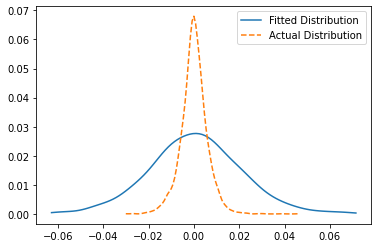

In [45]:
plt.plot(yhats, f1hat, '-', label='Fitted Distribution')
plt.plot(Xe, Fe, '--', label='Actual Distribution')
plt.legend()
plt.show()

In [ ]:
bounds = [[-10,10],[-10,10],[-10,10],[-10,10],[-10,10],[-10,10],[-10,10],[-10,10]]
result4 = differential_evolution(svjdproc1, bounds, x0=betab3,maxiter=100, popsize=100, tol=.001, workers= 12)
result4

In [ ]:
result4